In [204]:
import numpy as np
import pandas as pd
from pyomeca import Markers3d
from scipy.signal import find_peaks
import pyomeca
#data = Markers3d.from_c3d()
data = pyomeca.Markers3d.from_c3d('B0346_proste_pilka_P.c3d')

In [205]:
markers = pyomeca.Markers3d.from_c3d('B0346_proste_pilka_P.c3d')
print(f"Frame one is {markers.get_first_frame} and last frame is {markers.get_last_frame}")
print(f"There is {markers.get_num_markers()} markers.")
print(f"Marker names are : {markers.get_labels}")

Frame one is 0 and last frame is 3099
There is 192 markers.
Marker names are : ['Pilka:P1', 'B0346:LFHD', 'B0346:RFHD', 'B0346:LBHD', 'B0346:RBHD', 'B0346:C7', 'B0346:T10', 'B0346:CLAV', 'B0346:RBAK', 'B0346:LSHO', 'B0346:LUPA', 'B0346:LELB', 'B0346:LFRM', 'B0346:LWRA', 'B0346:LWRB', 'B0346:LFIN', 'B0346:RSHO', 'B0346:RUPA', 'B0346:RELB', 'B0346:RFRM', 'B0346:RWRA', 'B0346:RWRB', 'B0346:RFIN', 'B0346:LASI', 'B0346:RASI', 'B0346:LPSI', 'B0346:RPSI', 'B0346:LTHI', 'B0346:LKNE', 'B0346:LTIB', 'B0346:LANK', 'B0346:LHEE', 'B0346:LTOE', 'B0346:RTHI', 'B0346:RKNE', 'B0346:RTIB', 'B0346:RANK', 'B0346:RHEE', 'B0346:RTOE', 'B0346:PELO', 'B0346:PELA', 'B0346:PELL', 'B0346:PELP', 'B0346:LFEO', 'B0346:LFEA', 'B0346:LFEL', 'B0346:LFEP', 'B0346:LTIO', 'B0346:LTIA', 'B0346:LTIL', 'B0346:LTIP', 'B0346:LFOO', 'B0346:LFOA', 'B0346:LFOL', 'B0346:LFOP', 'B0346:LTOO', 'B0346:LTOA', 'B0346:LTOL', 'B0346:LTOP', 'B0346:RFEO', 'B0346:RFEA', 'B0346:RFEL', 'B0346:RFEP', 'B0346:RTIO', 'B0346:RTIA', 'B0346:RTIL', '

In [206]:
distance = data['B0346:RFIN'] - data['Pilka:P1']  # You can also reference the markers using data[:, idx, :] where idx is the number of the marker
norm_distance = distance.norm()
print(norm_distance)
norm_distance.shape

[[[1003.25752581 1003.31227441 1003.26019561 ...  932.27081497
    930.79044093  929.18333992]]]


(1, 1, 3100)

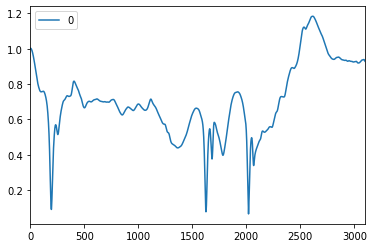

In [207]:
dfd = norm_distance.reshape(3100,1)
dfd1 = pd.DataFrame(dfd)
dfd1 = dfd1/1000
dfd1
dfd1.plot()
#dystans efektywny




,0
0,NaN
1,0.094739
2,0.113461
3,0.136858
4,0.162992
...,...
3095,0.028821
3096,0.026164
3097,0.023195
3098,0.020354


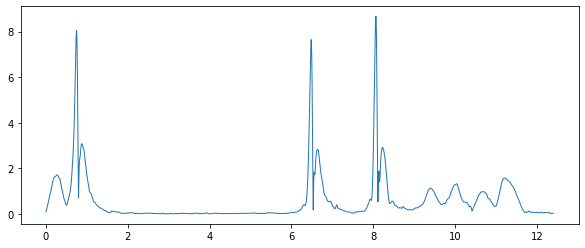

In [208]:
v = (data[('B0346:RFIN')]/1000).derivative().norm()
v.plot()
v.shape
vP = v.reshape(3100,1)
vP = pd.DataFrame(vP)
vP

In [209]:
t = data.get_time_frames
t.shape
t = pd.DataFrame(t)


,0
0,NaN
1,0.028204
2,0.029153
3,0.030183
4,0.031313
...,...
3095,0.639073
3096,0.639927
3097,0.641204
3098,0.643825


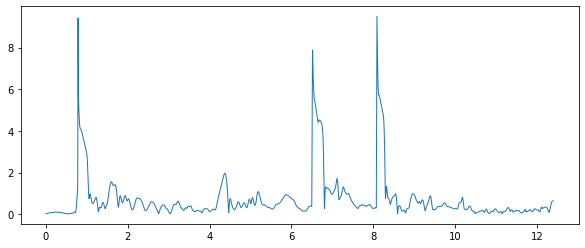

In [210]:
v1 = (data[('Pilka:P1')]/1000).derivative().norm()
v1.plot()
vB = v1.reshape(3100 ,1)
vB = pd.DataFrame(vB)
vB



,0
0,NaN
1,0.086562
2,0.095500
3,0.104471
4,0.113472
...,...
3095,0.019348
3096,0.019962
3097,0.020623
3098,0.021313


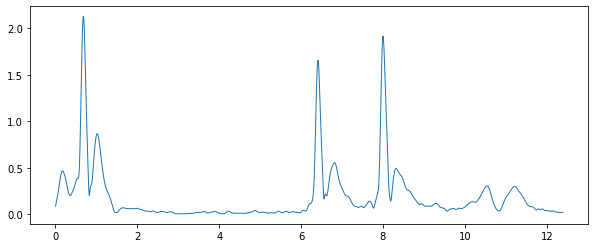

In [211]:
v2 = (data[('B0346:RSHO')]/1000).derivative().norm()
v2.plot()
vSho = v2.reshape(3100 ,1)
vSho = pd.DataFrame(vSho)
vSho

In [212]:
df_all_cols = pd.concat([t, vB, vP, dfd1, vSho], axis = 1)
df_all_cols.columns =['t', 'vB', 'vP', 'dfd1', 'vSho']
df_all_cols



,t,vB,vP,dfd1,vSho
0,0.000,NaN,NaN,1.003258,NaN
1,0.004,0.028204,0.094739,1.003312,0.086562
2,0.008,0.029153,0.113461,1.003260,0.095500
3,0.012,0.030183,0.136858,1.003101,0.104471
4,0.016,0.031313,0.162992,1.002834,0.113472
...,...,...,...,...,...
3095,12.380,0.639073,0.028821,0.934851,0.019348
3096,12.384,0.639927,0.026164,0.933625,0.019962
3097,12.388,0.641204,0.023195,0.932271,0.020623
3098,12.392,0.643825,0.020354,0.930790,0.021313


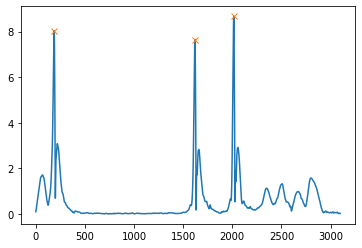

In [213]:
import matplotlib.pyplot as plt
peaks, _ = find_peaks(df_all_cols['vP'], height=6.0)
plt.plot(df_all_cols['vP'])
plt.plot(peaks, df_all_cols['vP'][peaks], "x")
plt.show()

In [214]:
punch =  df_all_cols.iloc[peaks,:]
punch[["t", "vP", "dfd1", ]]

,t,vP,dfd1
188,0.752,8.037903,0.206053
1620,6.480,7.646659,0.200151
2015,8.060,8.671945,0.187596


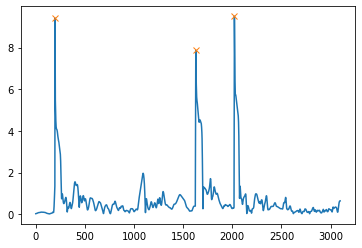

In [216]:
peaks, _ = find_peaks(df_all_cols['vB'], height=7)
plt.plot(df_all_cols['vB'])
plt.plot(peaks, df_all_cols['vB'][peaks], "x")
plt.show()


In [217]:
ball =  df_all_cols.iloc[peaks,:]
ball[["t", "vB", "dfd1"]]

,t,vB,dfd1
197,0.788,9.418794,0.093463
1629,6.516,7.882120,0.088159
2022,8.088,9.507837,0.080508


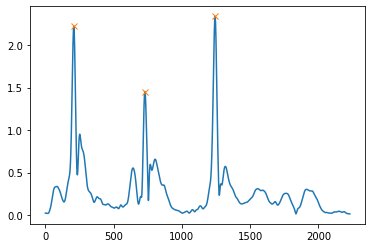

In [15]:
peaks, _ = find_peaks(df_all_cols['vSho'], height=1.4)
plt.plot(df_all_cols['vSho'])
plt.plot(peaks, df_all_cols['vSho'][peaks], "x")
plt.show()

In [16]:
bark =  df_all_cols.iloc[peaks,:]
bark[["t", "vSho"]]

,t,vSho
209,0.836,2.222447
730,2.920,1.454151
1243,4.972,2.340195


[[[602.88889473 602.99429285 603.08389621 ... 610.64502009 610.64421227
   610.6369378 ]]]


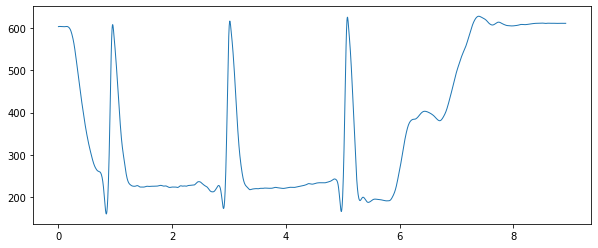

In [17]:
limb_distance = data['B0346:LSHO'] - data['B0346:LFIN']  # You can also reference the markers using data[:, idx, :] where idx is the number of the marker
limb_norm_distance = limb_distance.norm()
print(limb_norm_distance)
limb_norm_distance.shape
limb_norm_distance.plot()


In [18]:
limb = limb_norm_distance.reshape(2232,1)
limb = pd.DataFrame(limb)
limb = limb.max()
limb =limb/10
limb

0    62.734223
dtype: float64

In [19]:
limbpd = limb_norm_distance.reshape(2232,1)
limbpd = pd.DataFrame(limbpd)
limbpd


,0
0,602.888895
1,602.994293
2,603.083896
3,603.157320
4,603.213894
...,...
2227,610.629743
2228,610.639902
2229,610.645020
2230,610.644212


In [20]:
ed = punch['dfd1'].div(62.734223)
ed

227     0.003166
742     0.003111
1260    0.002424
Name: dfd1, dtype: float64

In [21]:
df_all_cols2 = pd.concat([t, vB, vP, dfd1, vSho, limbpd ], axis = 1)
df_all_cols2.columns =['t', 'vB', 'vP', 'dfd1', 'vSho', 'limbpd']
df_all_cols2

,t,vB,vP,dfd1,vSho,limbpd
0,0.000,NaN,NaN,1.181826,NaN,602.888895
1,0.004,0.015426,0.061724,1.181998,0.023217,602.994293
2,0.008,0.014891,0.057787,1.182146,0.022943,603.083896
3,0.012,0.015018,0.054014,1.182271,0.022680,603.157320
4,0.016,0.015659,0.050488,1.182370,0.022455,603.213894
...,...,...,...,...,...,...
2227,8.908,0.423271,0.018660,1.438713,0.013814,610.629743
2228,8.912,0.422665,0.022740,1.440005,0.013877,610.639902
2229,8.916,0.422258,0.027594,1.441286,0.014007,610.645020
2230,8.920,0.421875,0.032912,1.442553,0.014210,610.644212


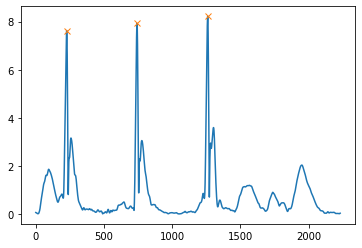

In [22]:
import matplotlib.pyplot as plt
peaks, _ = find_peaks(df_all_cols['vP'], height=6.0)
plt.plot(df_all_cols['vP'])
plt.plot(peaks, df_all_cols['vP'][peaks], "x")
plt.show()

In [23]:
punch2 =  df_all_cols2.iloc[peaks,:]
punch2[["t", "vP", "dfd1", "limbpd"]]

,t,vP,dfd1,limbpd
227,0.908,7.628797,0.198604,401.844561
742,2.968,7.923945,0.195136,406.883520
1260,5.040,8.222861,0.152095,420.872886
